In [1]:
import xarray as xr
from xcube.core.rectify import rectify_dataset

In [2]:
src_ds = xr.open_zarr('S3-OLCI-L2A.zarr.zip')
src_ds

<xarray.Dataset>
Dimensions:        (x: 1189, y: 1890)
Coordinates:
    lat            (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
    lon            (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
Dimensions without coordinates: x, y
Data variables:
    quality_flags  (y, x) uint32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_3         (y, x) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_6         (y, x) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_8         (y, x) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

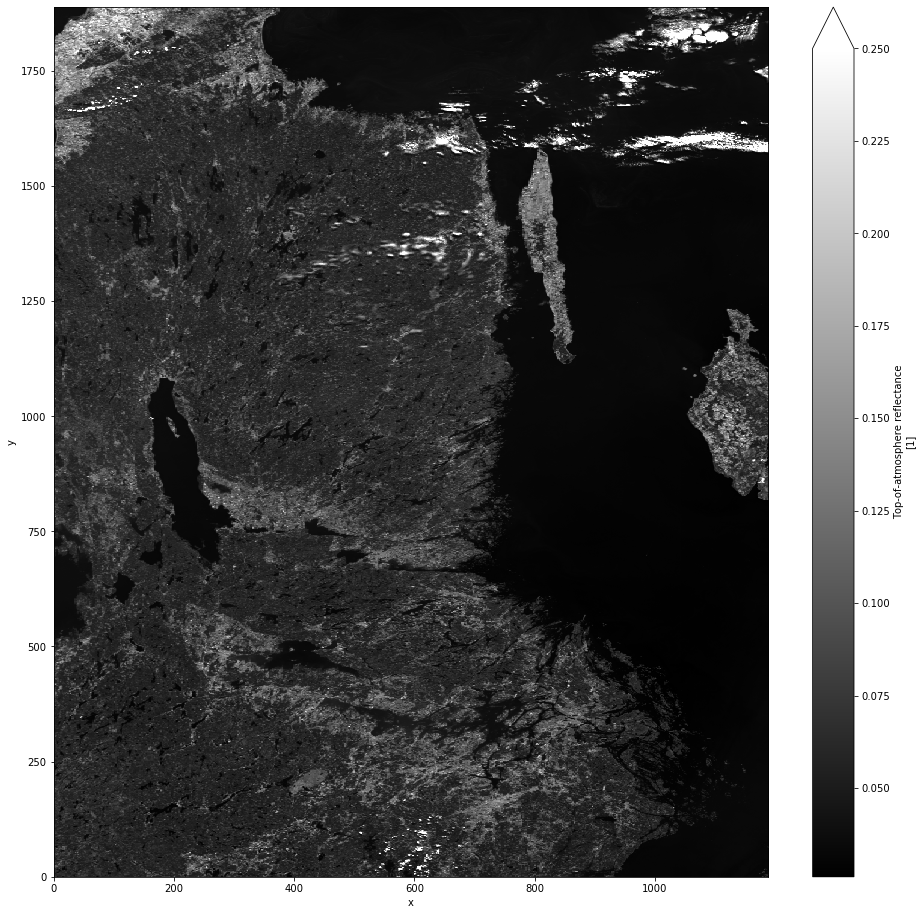

In [7]:
src_ds.rtoa_8.plot.imshow(figsize=(16,16), vmax=0.25, cmap='gray')

In [11]:
dst_ds = rectify_dataset(src_ds, var_names='rtoa_8', tile_size=(1024, 1024))

c:\users\norman\ideaprojects\xcube\xcube\core\geocoding.py:374: UserWarning: could not parse CRS from dataset attributes: CF projection parameters missing 'grid_mapping_name'
  warnings.warn(f'could not parse CRS from dataset attributes: {e}', )


In [12]:
dst_ds

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 6624, lon: 8905)
Coordinates:
  * lat       (lat) float64 55.2 55.2 55.2 55.2 55.2 ... 60.64 60.64 60.64 60.64
  * lon       (lon) float64 12.69 12.7 12.7 12.7 12.7 ... 20.0 20.0 20.0 20.01
    lon_bnds  (lon, bnds) float64 12.69 12.7 12.7 12.7 ... 20.0 20.0 20.0 20.01
    lat_bnds  (lat, bnds) float64 55.2 55.2 55.2 55.2 ... 60.64 60.64 60.64
Dimensions without coordinates: bnds
Data variables:
    rtoa_8    (lat, lon) float32 dask.array<chunksize=(1024, 1024), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

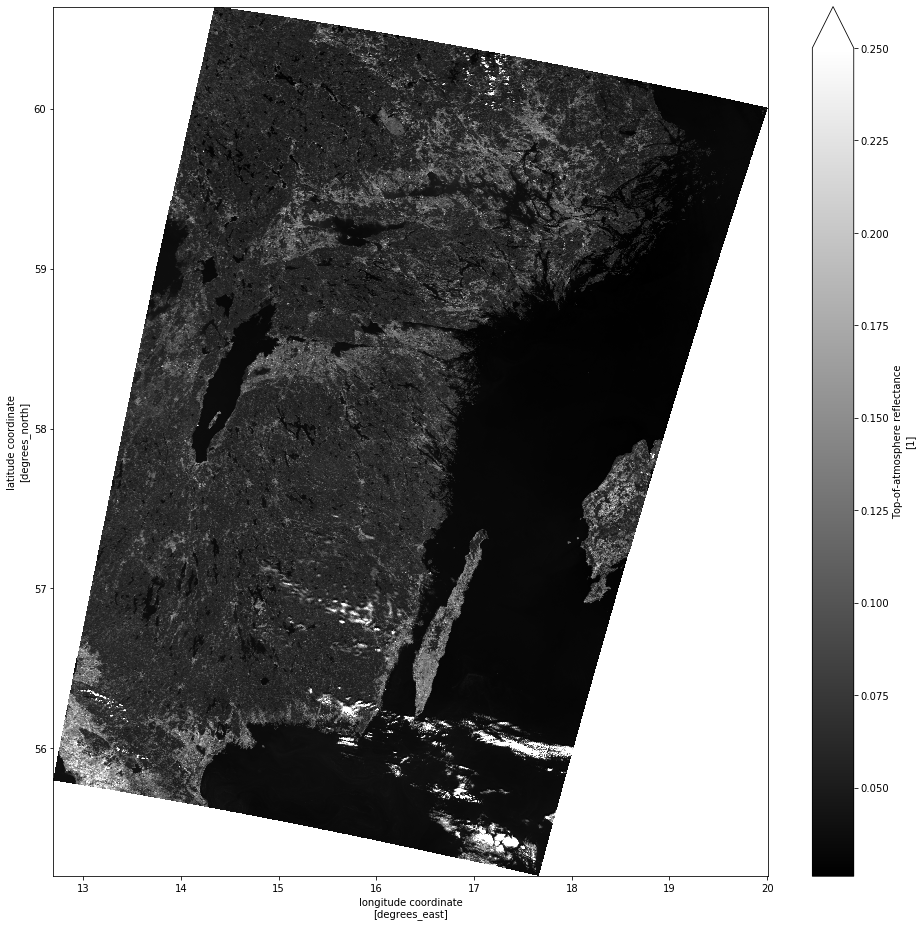

In [13]:
dst_ds.rtoa_8.plot.imshow(figsize=(16,16), vmax=0.25, cmap='gray')